<h1 style="color:blue;">Group 4 Final Project</h1>


<font size="5">Members:</font> <br> Birendra Khimding <br> Muzhgan Rustaqi <br> Andrew Fennimore

In [24]:
import pandas as pd

# Read Data from the MJX
url = "https://raw.githubusercontent.com/Fenn3963/Weather-Impact-on-Air-Traffic-Management/refs/heads/main/MJX.csv"
weather = pd.read_csv(url , na_values= "M")
print(weather)

# Column Names
weather.columns

      station             valid  tmpf  dwpf   relh   drct  sknt  p01i   alti  \
0         MJX  2024-01-01 00:56  32.0  29.0  88.53    0.0   0.0  0.00  30.03   
1         MJX  2024-01-01 02:56  32.0  29.0  88.53    0.0   0.0  0.00  30.03   
2         MJX  2024-01-01 03:56  33.0  30.0  88.58    0.0   0.0  0.00  30.04   
3         MJX  2024-01-01 04:56  35.0  30.0  81.78    0.0   0.0  0.00  30.03   
4         MJX  2024-01-01 13:56  40.0  34.0  78.94  360.0   3.0  0.00  30.03   
...       ...               ...   ...   ...    ...    ...   ...   ...    ...   
11418     MJX  2025-02-01 19:56  38.0  12.0  33.84  300.0  17.0  0.00  30.22   
11419     MJX  2025-02-01 20:56  37.0  11.0  33.67  310.0  14.0  0.00  30.26   
11420     MJX  2025-02-01 21:56  34.0   8.0  33.16  320.0  10.0  0.00  30.31   
11421     MJX  2025-02-01 22:56  31.0  11.0  42.79  320.0   8.0  0.00  30.35   
11422     MJX  2025-02-01 23:56  29.0  10.0  44.40  350.0   9.0  0.00  30.40   

         mslp  ...  wxcodes  ice_accret

Index(['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
       'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
       'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr',
       'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'feel', 'metar', 'snowdepth'],
      dtype='object')

In [ ]:
# Number of Missing vlaues in the dataframe
weather.isna().sum()

station                  0
valid                    0
tmpf                     5
dwpf                     7
relh                     7
drct                   282
sknt                     8
p01i                     3
alti                   111
mslp                  2495
vsby                     1
gust                  9568
skyc1                   30
skyc2                 9246
skyc3                10618
skyc4                11423
skyl1                 4939
skyl2                 9246
skyl3                10618
skyl4                11423
wxcodes               9072
ice_accretion_1hr    11423
ice_accretion_3hr    11423
ice_accretion_6hr    11423
peak_wind_gust       10971
peak_wind_drct       10971
peak_wind_time       10971
feel                     9
metar                    0
snowdepth            11423
dtype: int64

In [ ]:
# Setting a threshold to remove any column with more then 15% missing value
threshold = len(weather)*.15
cols_drop_nan = weather.columns[weather.isna().sum() <= threshold]

# Drop row with missing values
weather.dropna(subset=cols_drop_nan, inplace=True)
weather.isna().sum()

station                  0
valid                    0
tmpf                     0
dwpf                     0
relh                     0
drct                     0
sknt                     0
p01i                     0
alti                     0
mslp                  2305
vsby                     0
gust                  9208
skyc1                    0
skyc2                 8907
skyc3                10235
skyc4                10996
skyl1                 4751
skyl2                 8907
skyl3                10235
skyl4                10996
wxcodes               8732
ice_accretion_1hr    10996
ice_accretion_3hr    10996
ice_accretion_6hr    10996
peak_wind_gust       10557
peak_wind_drct       10557
peak_wind_time       10557
feel                     0
metar                    0
snowdepth            10996
dtype: int64

In [ ]:
# Droping columns with more then 15% missing values

cols_to_drop = weather.columns[weather.isna().sum() > 0]
print(cols_to_drop)
weather.drop(columns=cols_to_drop , inplace=True)
weather.isna().sum()

Index(['mslp', 'gust', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3',
       'skyl4', 'wxcodes', 'ice_accretion_1hr', 'ice_accretion_3hr',
       'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct',
       'peak_wind_time', 'snowdepth'],
      dtype='object')


station    0
valid      0
tmpf       0
dwpf       0
relh       0
drct       0
sknt       0
p01i       0
alti       0
vsby       0
skyc1      0
feel       0
metar      0
dtype: int64

In [ ]:
# Renaming Column names 

weather.rename(columns={'valid': 'timestamp', 'tmpf': 'air_temperature','dwpf':'dew_temperature', 'relh':'humidity', 'drct':'wind_direction', 'sknt':'wind_speed', 'p01i':'one_hour_precp' , 'alti':'pressure_altimeter', 'vsby':'visibility', 'skyc1':'cloud_coverage', 'feel':'apparent_temp', 'metar':'unprocessed_observation'  } , inplace=True)
weather.columns

Index(['station', 'timestamp', 'air_temperature', 'dew_temperature',
       'humidity', 'wind_direction', 'wind_speed', 'one_hour_precp',
       'pressure_altimeter', 'visibility', 'cloud_coverage', 'apparent_temp',
       'unprocessed_observation'],
      dtype='object')

In [ ]:
# Checking for the columns data type
weather.dtypes



station                     object
timestamp                   object
air_temperature            float64
dew_temperature            float64
humidity                   float64
wind_direction             float64
wind_speed                 float64
one_hour_precp              object
pressure_altimeter         float64
visibility                 float64
cloud_coverage              object
apparent_temp              float64
unprocessed_observation     object
dtype: object

In [ ]:
#Replacing Char value to float 

weather['one_hour_precp'] = weather['one_hour_precp'].replace('T', '0.001')
print(weather['one_hour_precp'].unique())

['0.00' '0.02' '0.001' '0.01' '0.04' '0.07' '0.09' '0.03' '0.10' '0.17'
 '0.08' '0.06' '0.05' '0.14' '0.16' '0.11' '0.33' '0.29' '0.18' '0.12'
 '0.26' '0.15' '0.13' '0.27' '0.25' '0.36' '0.42' '0.19' '0.21' '0.35'
 '0.41' '0.45' '0.54' '0.57' '0.58' '0.32' '0.37' '0.38' '0.31' '0.46'
 '0.22' '0.20' '0.43' '0.23' '0.40']


In [19]:
weather.dtypes

station                     object
timestamp                   object
air_temperature            float64
dew_temperature            float64
humidity                   float64
wind_direction             float64
wind_speed                 float64
one_hour_precp             float64
pressure_altimeter         float64
visibility                 float64
cloud_coverage              object
apparent_temp              float64
unprocessed_observation     object
dtype: object

In [ ]:
#Changing the one_hour_precp column data type to float
weather['one_hour_precp'] = weather['one_hour_precp'].astype(float)

In [ ]:
# Checking for number of 0.0 vlueas in the dataframe
col_with_zeor = (weather == 0.0).sum()
print(col_with_zeor)

station                       0
timestamp                     0
air_temperature               1
dew_temperature              17
humidity                      0
wind_direction             2413
wind_speed                 2413
one_hour_precp             9015
pressure_altimeter            0
visibility                    0
cloud_coverage                0
apparent_temp                 1
unprocessed_observation       0
dtype: int64


In [ ]:
# Catagorical Columns
weather.value_counts('cloud_coverage')

cloud_coverage
CLR    4751
OVC    2426
BKN    1574
FEW    1177
SCT    1056
VV       12
Name: count, dtype: int64

In [ ]:
# Numerical Columns
weather.describe()

,air_temperature,dew_temperature,humidity,wind_direction,wind_speed,one_hour_precp,pressure_altimeter,visibility,apparent_temp
count,10996.000000,10996.000000,10996.000000,10996.000000,10996.000000,10996.000000,10996.000000,10996.000000,10996.000000
mean,54.358912,45.683994,75.692858,162.255366,6.045289,0.004918,30.015949,8.902533,52.875810
std,18.421437,18.554783,20.662578,122.104134,4.727821,0.028333,0.234430,2.598984,21.256972
min,-2.000000,-6.000000,15.730000,0.000000,0.000000,0.000000,29.260000,0.250000,-6.750000
25%,41.000000,32.000000,59.650000,30.000000,3.000000,0.000000,29.880000,10.000000,36.760000
50%,54.000000,47.000000,81.170000,180.000000,6.000000,0.000000,30.010000,10.000000,54.000000
75%,69.800000,60.000000,93.450000,280.000000,9.000000,0.000000,30.160000,10.000000,69.800000
max,100.000000,80.600000,100.000000,360.000000,30.000000,0.580000,30.960000,10.000000,114.200000


Univariate EDA (Single Variable Analysis)

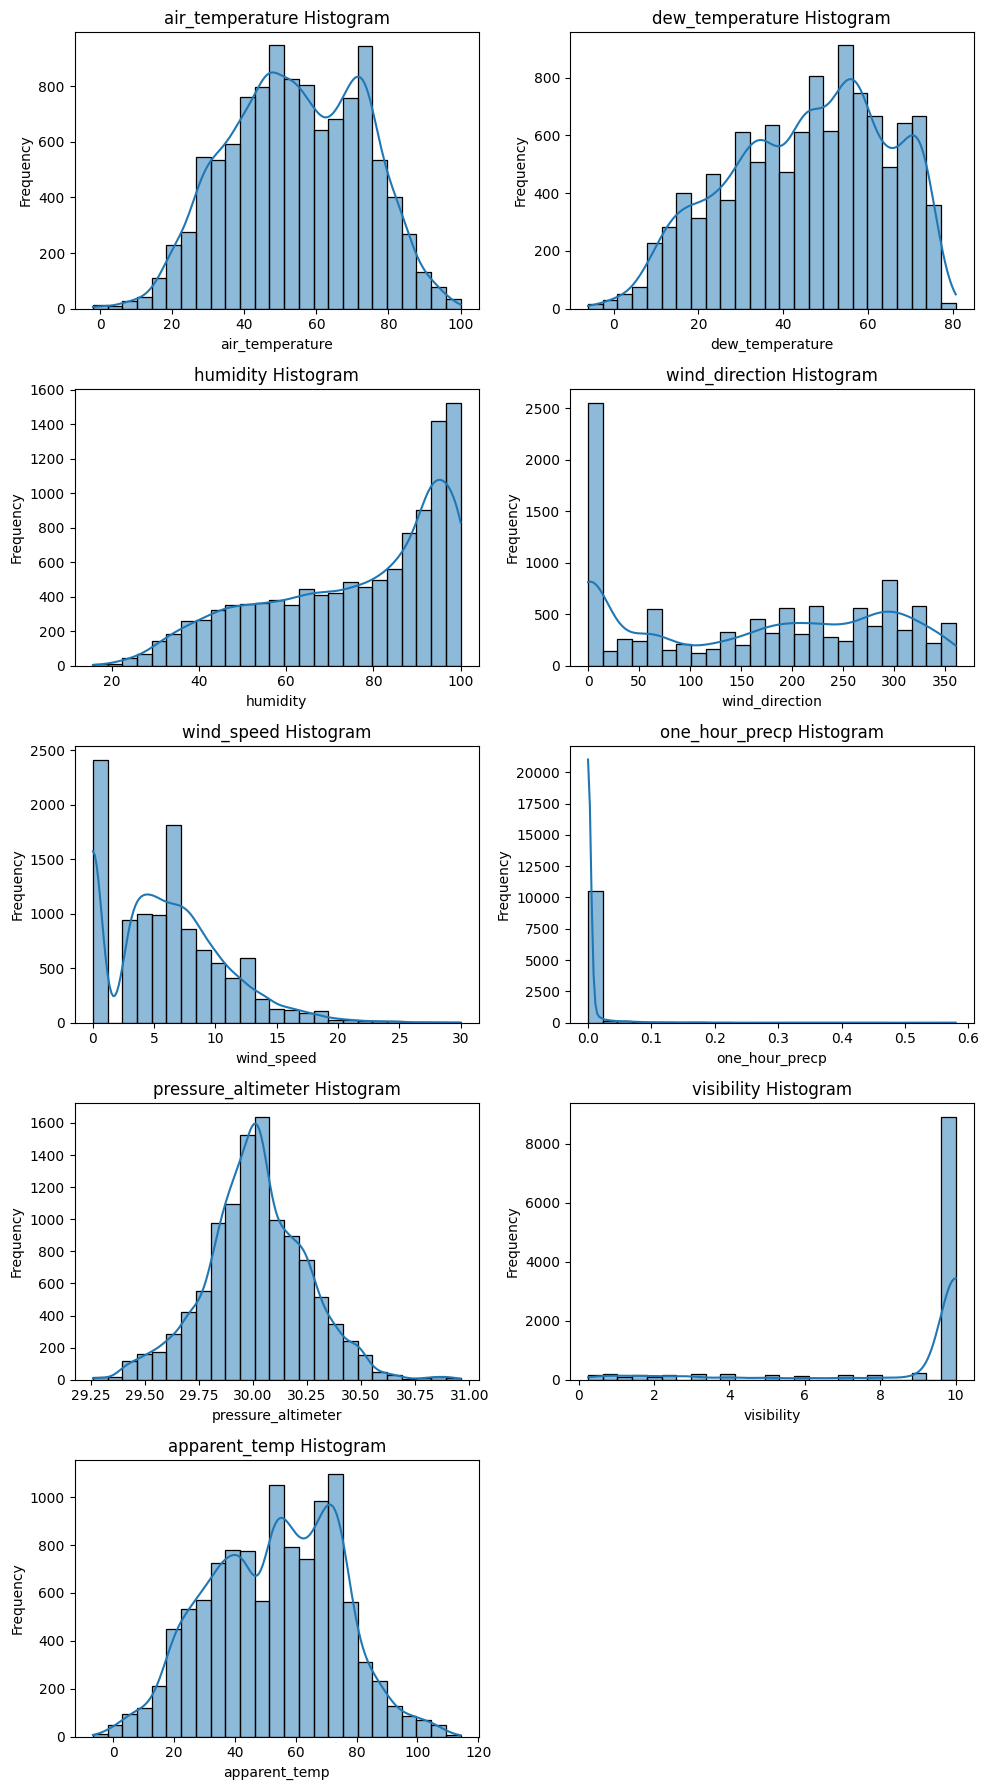

In [ ]:
# Univariate EDA (Single Variable Analysis)

# Histogram for all the Numerical Column
import seaborn as sns 
import matplotlib.pyplot as plt 

columns_to_plot = ['air_temperature', 'dew_temperature', 'humidity','wind_direction' ,'wind_speed', 'one_hour_precp', 'pressure_altimeter', 'visibility', 'apparent_temp']

fig, axes = plt.subplots(5, 2, figsize=(10, 18)) 
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    sns.histplot(weather[col], kde=True, ax=axes[i], bins=25)  # kde=True adds a density curve
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

if len(columns_to_plot) < len(axes):
    axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

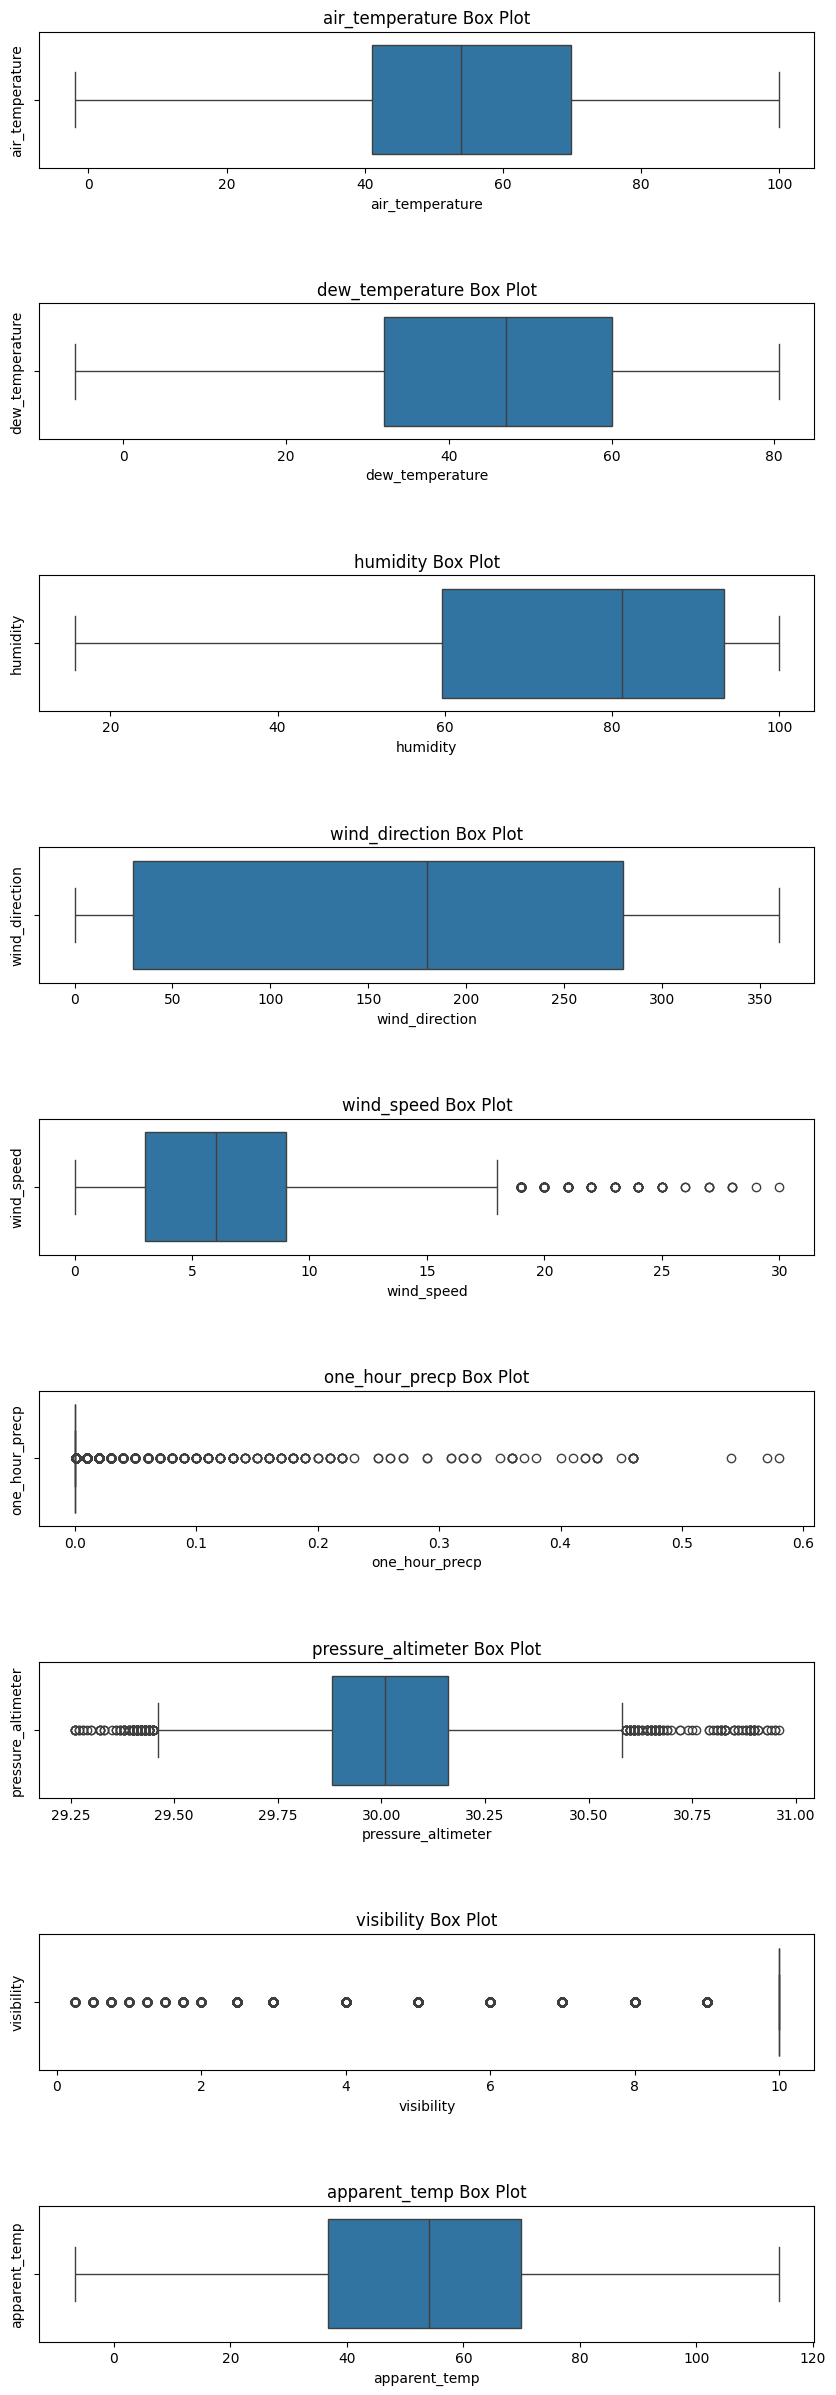

In [ ]:
# Box plot for all the numerical columns

fig, axes = plt.subplots(9, 1, figsize=(10, 30))  
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    if col in weather.columns:
        sns.boxplot(x=weather[col], ax=axes[i])  # Box plot for each variable
        axes[i].set_title(f'{col} Box Plot')
        axes[i].set_ylabel(col)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Hide the last unused subplot if necessary
if len(columns_to_plot) < len(axes):
    axes[-1].set_visible(False)

plt.subplots_adjust(hspace=1)
plt.show()

Bivariate EDA (Two Variable Analysis)

In [ ]:
#Bivariate EDA (Two Variable Analysis)

# Drop non-numeric columns
weather_numeric = weather.select_dtypes(include=['number'])

# The correlation matrix
correlation_matrix = weather_numeric.corr()
print(correlation_matrix)


                    air_temperature  dew_temperature  humidity  \
air_temperature            1.000000         0.890447 -0.120030   
dew_temperature            0.890447         1.000000  0.338121   
humidity                  -0.120030         0.338121  1.000000   
wind_direction            -0.009537        -0.179818 -0.384151   
wind_speed                 0.141349        -0.070859 -0.451061   
one_hour_precp             0.033981         0.106513  0.179136   
pressure_altimeter        -0.206105        -0.232368 -0.097974   
visibility                 0.069919        -0.099245 -0.415011   
apparent_temp              0.991233         0.899063 -0.082040   

                    wind_direction  wind_speed  one_hour_precp  \
air_temperature          -0.009537    0.141349        0.033981   
dew_temperature          -0.179818   -0.070859        0.106513   
humidity                 -0.384151   -0.451061        0.179136   
wind_direction            1.000000    0.537965       -0.017751   
wind_spee

In [ ]:
# Cloud_coverage and Visibility
visibility_by_cloud = weather.groupby('cloud_coverage')['visibility'].mean()
print(visibility_by_cloud)

cloud_coverage
BKN    8.720775
CLR    9.762682
FEW    9.333050
OVC    7.067292
SCT    9.132102
VV     0.791667
Name: visibility, dtype: float64


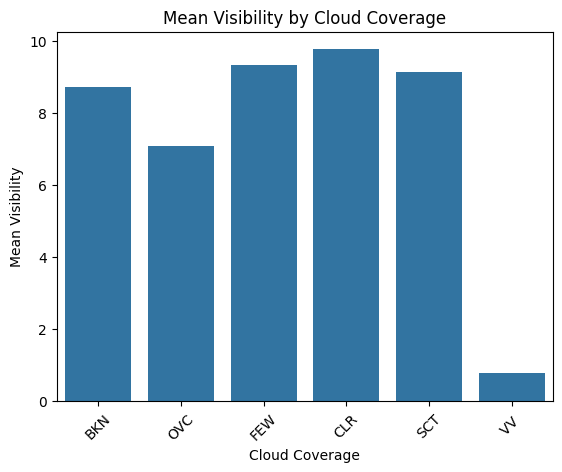

In [ ]:

# Cloud_coverage and Visibility
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot to show the mean visibility by cloud coverage
sns.barplot(x='cloud_coverage', y='visibility', data=weather, estimator='mean', errorbar=None)

plt.title('Mean Visibility by Cloud Coverage')
plt.xlabel('Cloud Coverage')
plt.ylabel('Mean Visibility')
plt.xticks(rotation=45)  
plt.show()

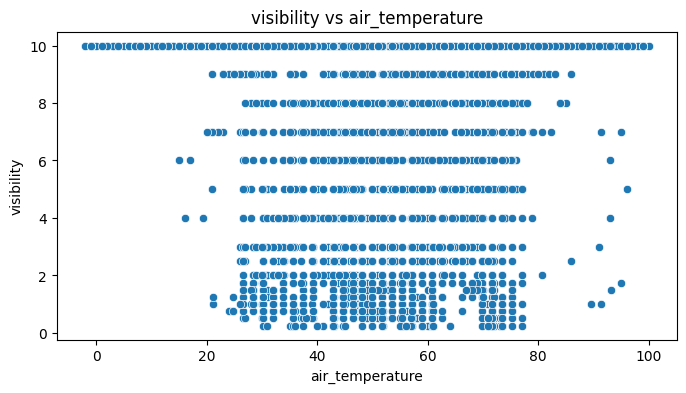

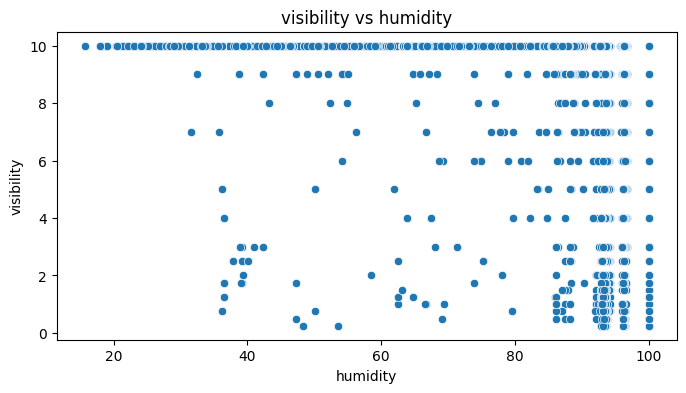

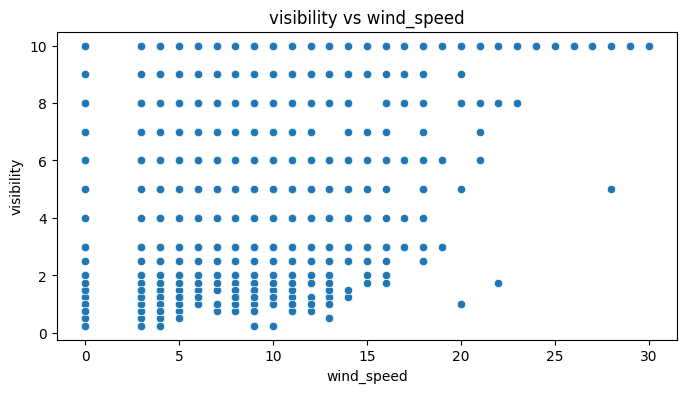

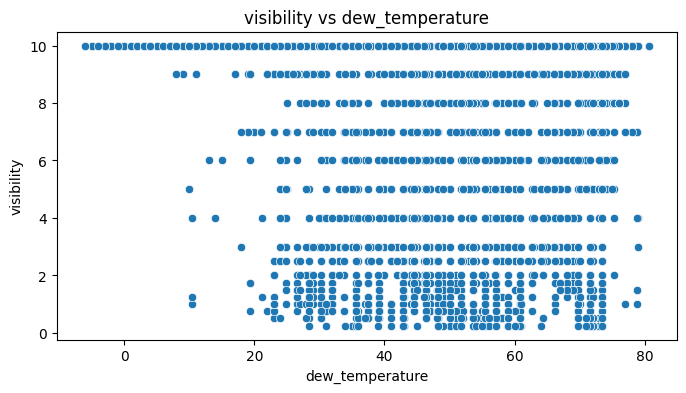

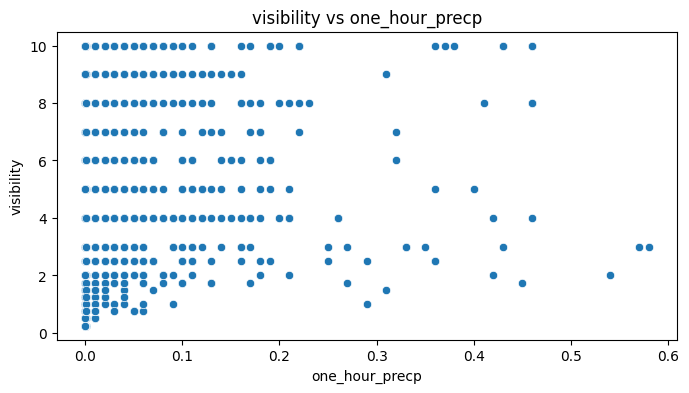

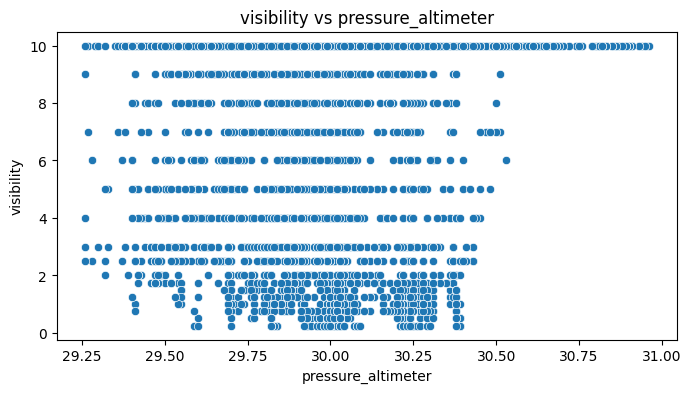

In [ ]:

# Visibility with all other Numerical columns
pairs_to_plot = [
    ('air_temperature', 'visibility'),
    ('humidity', 'visibility'),
    ('wind_speed', 'visibility'),
    ('dew_temperature', 'visibility'),
    ('one_hour_precp', 'visibility'),
    ('pressure_altimeter', 'visibility')
]

# Create scatter plots for each pair
for col1, col2 in pairs_to_plot:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=weather[col1], y=weather[col2])
    plt.title(f'{col2} vs {col1}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()



Multivariate EDA (Multiple Variables Analysis)

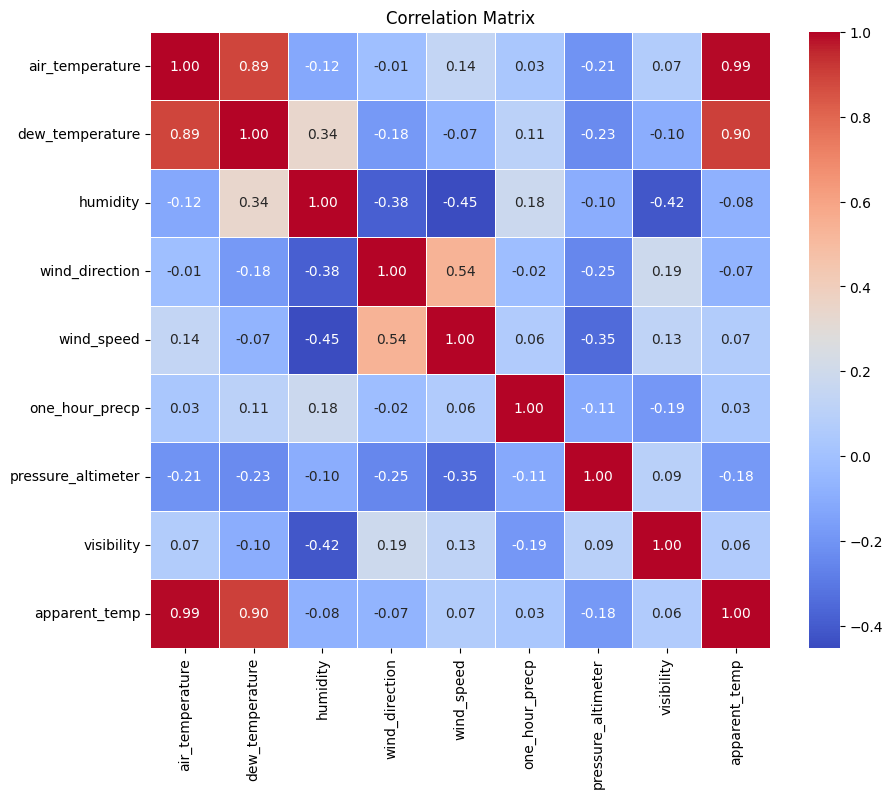

In [ ]:
# Multivariate EDA (Multiple Variables Analysis)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()